In [1]:
from glob import glob
import os

import random
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import adam_v2, rmsprop_v2, gradient_descent_v2
from keras.callbacks import EarlyStopping

In [95]:
jj = 14

### b dataset
name = f'futures_b{jj}_0.csv'
df_b = pd.read_csv(name, header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'diff3', 'diff4', 'k1', 'k2']
k = 60-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_b.columns = cols2

### t dataset
df_t = pd.read_csv(f'futures_t{jj}_0.csv', header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'diff3', 'diff4', 'k1', 'k2']
k = 60-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_t.columns = cols2

### a dataset
df_a = pd.read_csv(f'futures_a{jj}_0.csv', header=None).drop_duplicates().dropna()
cols1 = ['coin', 'target2', 'target1', 'n', 'diff1', 'diff2', 'diff3', 'diff4', 'k1', 'k2']
k = 60-len(cols1)
cols2 = cols1 + [f"val_{i+1}" for i in range(k)]
df_a.columns = cols2

dsz = pd.concat([df_t, df_b, df_a], axis=0).drop_duplicates().dropna()
print(ds.shape, 'all')

lim1, lim2 = 0.325, 1.6

ds1 = dsz[dsz.target2>lim1]
ds2 = dsz[dsz.target2<-lim1]

ds = pd.concat([ds1, ds2])
ds = ds[ds.target2<lim2]
ds = ds[ds.target2>-lim2]
print(ds.shape, 'limits')

# k1_ = 6
# k2_ = 500

# ds = ds[ds.k1<=k1_]
# ds = ds[ds.k2<=k2_]

D = {}
dss = []
for i in [4]:
    dl = ds[ds.n==i]
    dss.append(dl)
    D[i]=dl
for d in D:
    dx = D[d]
    print(d, dx.shape[0])
print(ds.shape)
ds = pd.concat(dss)
ds

(10944, 60) all
(10458, 60) limits
4 10458
(10458, 60)


,coin,target2,target1,n,diff1,diff2,diff3,diff4,k1,k2,...,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49,val_50
4,DOGE,0.506439,1,4,-0.914932,-0.278993,-0.621727,-0.278993,6,7,...,0.368726,0.631274,0.471015,0.528985,0.489751,0.510249,0.490699,0.509301,0.504111,0.495889
6,DOGE,0.708792,1,4,-0.402168,-0.045264,-0.071649,-0.045264,7,5,...,0.538559,0.461441,0.544167,0.455833,0.536514,0.463486,0.545872,0.454128,0.516428,0.483572
10,DOGE,0.827208,1,4,-0.187753,0.037407,-0.068509,0.030465,5,9,...,0.435475,0.564525,0.468943,0.531057,0.502508,0.497492,0.481111,0.518889,0.455501,0.544499
12,DOGE,0.509772,1,4,-0.256743,0.130084,0.000000,0.130084,7,7,...,0.543122,0.456878,0.545766,0.454234,0.528665,0.471335,0.504359,0.495641,0.492514,0.507486
15,DOGE,0.738798,1,4,-0.626345,-0.099194,-0.561688,-0.148229,7,11,...,0.535526,0.464474,0.479748,0.520252,0.508809,0.491191,0.534512,0.465488,0.512355,0.487645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,LINK,-0.645250,0,4,0.235442,0.330930,0.220386,0.330930,14,5,...,0.565714,0.434286,0.524688,0.475312,0.460789,0.539211,0.587924,0.412076,0.424390,0.575610
16143,LINK,-0.525290,0,4,0.310317,0.399115,0.272490,0.399115,4,6,...,0.467542,0.532458,0.512231,0.487769,0.489512,0.510488,0.513465,0.486535,0.431142,0.568858
16145,LINK,-0.591024,0,4,0.351596,0.522066,0.082706,0.399004,5,5,...,0.521266,0.478734,0.534781,0.465219,0.457750,0.542250,0.486273,0.513727,0.419974,0.580026
16146,LINK,-0.484867,0,4,0.536147,0.651127,0.332959,0.628053,4,3,...,0.534819,0.465181,0.564259,0.435741,0.527724,0.472276,0.512899,0.487101,0.425848,0.574152


In [96]:
ds.groupby('n').size()

n
4    10458
dtype: int64

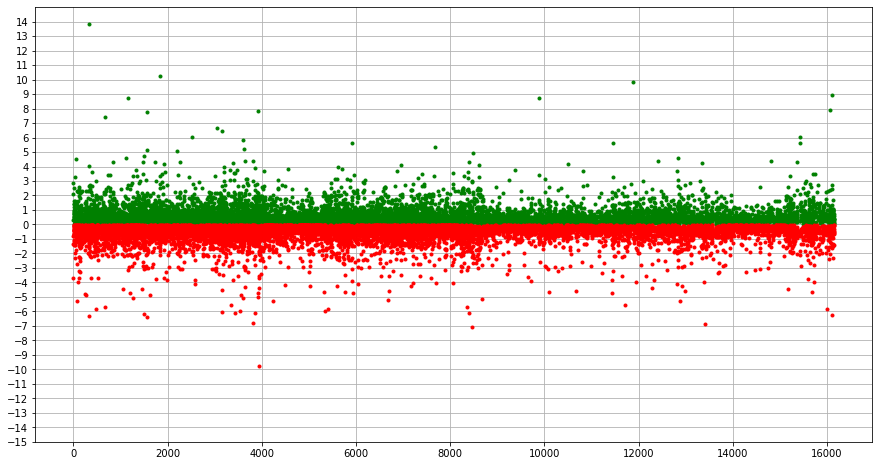

In [93]:
plt.figure(figsize=(15, 8))
plt.plot(dsz.target2[dsz.target1==1], ".", c='g')
plt.plot(dsz.target2[dsz.target1==0], ".", c='r')
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
plt.yticks([i/10 for i in range(-150, 150, 10)])
plt.grid()

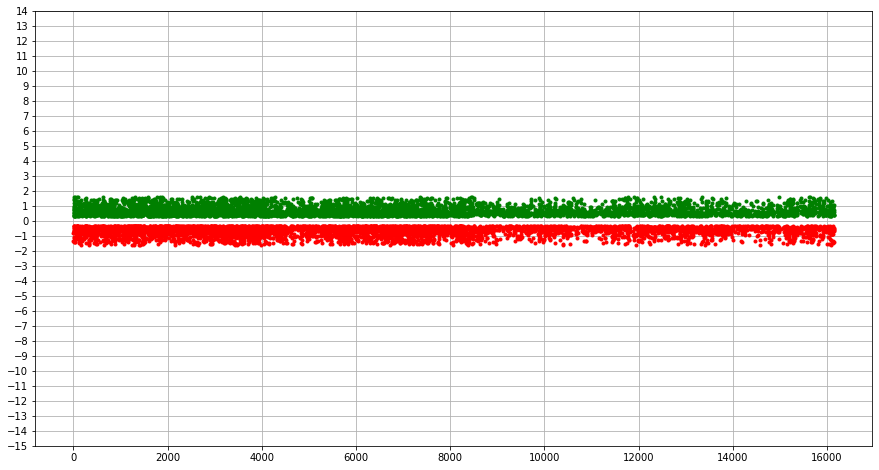

In [97]:
plt.figure(figsize=(15, 8))
plt.plot(ds.target2[ds.target1==1], ".", c='g')
plt.plot(ds.target2[ds.target1==0], ".", c='r')
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
plt.yticks([i/10 for i in range(-150, 150, 10)])
plt.grid()

In [37]:
# ds.groupby('k1').size().index.tolist()

In [38]:
# ds.groupby('k1').size()

In [39]:
# ds.groupby('k2').size().index.tolist()

In [40]:
# ds.groupby('k2').size()

<AxesSubplot:>

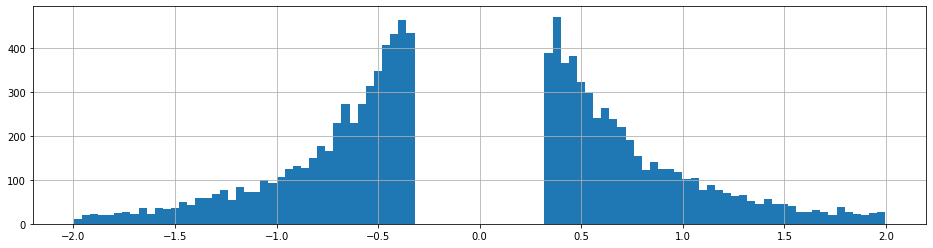

In [41]:
ds.target2.hist(bins=100, figsize=(16, 4))

In [42]:
jsjs = ds.groupby('coin').size().sort_values(ascending=False).to_frame().T
coins = list(jsjs.columns)
# coins = ['ETH', 'DOGE', 'EOS', 'DOT', 'UNI', 'ADA', 'BTC', 'LINK', 'BCH',\
#          'LTC', 'ETC', 'XRP', 'SOL', 'XLM', 'BNB', 'THETA', 'FTM', 'EGLD', 'LUNA', 'FIL']
print(coins)
print(len(coins))
jsjs

['DOGE', 'DOT', 'ETH', 'EOS', 'ADA', 'LINK', 'UNI', 'LTC', 'SOL', 'ETC', 'BCH', 'XLM', 'XRP', 'BTC', 'FTM', 'LUNA', 'THETA', 'EGLD', 'NEAR', 'FIL', 'BNB', 'AVAX', 'MANA', 'ATOM', 'GALA', 'MATIC', 'SAND', 'TRX']
28


coin,DOGE,DOT,ETH,EOS,ADA,LINK,UNI,LTC,SOL,ETC,...,NEAR,FIL,BNB,AVAX,MANA,ATOM,GALA,MATIC,SAND,TRX
0,775,733,689,573,569,552,514,506,464,426,...,282,267,247,244,237,233,232,227,218,160


In [43]:
# idxs = [i-1 for i in vals]
# print(idxs)

In [44]:
# xa = ds[['coin', 'target1']+list(ds.columns[-70:])]
# # desc = xa.describe().loc['mean']
# # desc
# # xa
# xa = xa[xa.coin=='ETH']
# for i in range(1, 71):
#     val1 = xa[f'val_{i}'].reset_index().drop(columns=['index'])

#     plt.figure(figsize=(12, 4))
#     plt.plot(xa.target1, val1, "x")
#     plt.title(f"val_{i}")
#     plt.ylim([0, 1.04])
#     plt.xticks([0, 1])
#     plt.yticks([i/10 for i in range(0, 11)])
#     plt.grid()
#     plt.plot()

In [45]:
ss = []
# for coin in theCoins:
k1s = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
k2s = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# for k1 in [4, 5, 6, 7, 8, 9, 10, 11, 12]:
for coin in coins:
# for n in [8, 12, 16, 20]:
    # vals = [1, 2, 3, 4, 5, 6, 8, 33, 34, 35, 36, 37, 38, 46, 53, 54, 55, 56, 57, 58, 65, 66, 67, 68]
    # ds = ds[[f"val_{i}" for i in vals]]
    # mm = 4
    ds = D[4] ### [8, 12, 16, 20]
    
#     ss = ['ETH', 'DOGE', 'EOS', 'UNI', 'DOT', 'ADA', 'LINK', 'BTC', 'BCH', 'LTC', 'XRP', 'ETC', 'SOL', 'XLM', 'BNB', 'THETA', 'FTM', 'LUNA', 'FIL', 'EGLD']
#     ss4 = ['EOS', 'DOT', 'UNI', 'ADA', 'BTC', 'LINK', 'BCH', 'LTC', 'XRP', 'XLM', 'BNB', 'THETA', 'FTM', 'EGLD']
#     fs = []
#     for coin in ss4:
#         # print(coin)
#         dr = ds[ds.coin==coin]
#         fs.append(dr)
#     ds = pd.concat(fs)
#     ds
#     ds.shape

#     ds = ds[ds.target2<1.]
#     ds = ds[ds.target2>-1.]
#     print(coin)
    
    dr = ds[ds.coin==coin]
#     dr = ds[ds.k1==k1]
#     dr = dr[dr.k2==k1]
#     dr = ds.copy()
    
    ### data X-Y
    X = dr.drop(columns=['coin', 'target1', 'target2', 'n', 'k1', 'k2']).values
    Y = dr.target1.values

    kl = 0.2
    x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size=kl, random_state=42)
    x_train.shape, x_test.shape, y_train.shape, y_test.shape

    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    ### model
    model = Sequential()
#     model.add(Dense(50, activation='sigmoid', input_shape=(50,)))
#     model.add(Dropout(.05))
#     model.add(Dense(100, activation='sigmoid'))
#     model.add(Dropout(.05))
#     model.add(Dense(50, activation='sigmoid'))
#     model.add(Dense(50, activation='sigmoid'))
#     model.add(Dense(50, activation='sigmoid'))
    rett = 54
    model.add(Dense(rett, activation='sigmoid', input_shape=(rett,)))
    model.add(Dropout(.05))
    model.add(Dense(rett, activation='sigmoid'))
    model.add(Dropout(.10))
#     model.add(Dense(200, activation='sigmoid'))
#     model.add(Dropout(.15))
#     model.add(Dense(400, activation='sigmoid'))
#     model.add(Dropout(.20))
#     model.add(Dense(800, activation='sigmoid'))
#     model.add(Dropout(.25))
#     model.add(Dense(1600, activation='sigmoid'))
#     model.add(Dropout(.30))

    # model.add(Dense(416, activation='tanh'))
    # model.add(Dropout(.05))
    # model.add(Dense(312, activation='linear'))
    # model.add(Dropout(.05))
    # model.add(Dense(156, activation='relu'))
    # model.add(Dropout(.05))

    # model.add(Dense(106, activation='hard_sigmoid'))
    # model.add(Dense(159, activation='hard_sigmoid'))
    # model.add(Dense(212, activation='hard_sigmoid'))
    # model.add(Dense(2, activation='hard_sigmoid'))

    model.add(Dense(1, activation='sigmoid'))
    
    opt = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    # opt = rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    # opt = gradient_descent_v2.SGD(learning_rate=0.001, decay=0.0)
    model.compile(loss='binary_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    hist = model.fit(x_train, y_train,
              epochs=80,
              validation_data=(x_test, y_test),
              # callbacks=[callback],
              verbose=0)
    score = model.evaluate(x_test, y_test,verbose=1)
    if score[0]<0.35:
        ss.append(coin)
    
#     print(n, Y.shape, score)
    print(coin, Y.shape, score)
#     print(k1, Y.shape, score)

print(ss)

5/5 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9935
DOGE (775,) [0.01953842118382454, 0.9935483932495117]
5/5 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9932
DOT (733,) [0.018664516508579254, 0.9931972622871399]
5/5 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9855
ETH (689,) [0.030076486989855766, 0.9855072498321533]
4/4 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 1.0000
EOS (573,) [0.013477572239935398, 1.0]
4/4 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9825
ADA (569,) [0.029379846528172493, 0.9824561476707458]
4/4 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000
LINK (552,) [0.012899684719741344, 1.0]
4/4 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9903
UNI (514,) [0.03945794701576233, 0.9902912378311157]
4/4 [==============================] - 0s 2ms/step - loss

In [74]:
len(['DOGE', 'ETH', 'DOT', 'EOS', 'ADA', 'LINK', 'LTC', 'UNI', 'SOL', 'BCH', 'ETC', 'BTC', 'XRP', 'XLM', 'FTM', 'LUNA', 'EGLD', 'THETA', 'TRX'])

19

In [12]:
ss4 = ['DOGE', 'ETH', 'DOT', 'ADA', 'EOS', 'LTC', 'LINK', 'UNI', 'SOL', 'ETC', 'BCH', 'XLM', 'XRP', 'BTC', 'FIL', 'LUNA', 'FTM', 'THETA', 'BNB', 'MATIC', 'SAND']
len(ss4)

21

In [46]:
### data selected
mm = 4
ds = D[mm]
# ds.shape
# ds

ss = ['ETH', 'DOGE', 'EOS', 'UNI', 'DOT', 'ADA', 'LINK', 'BTC', 'BCH', 'LTC', 'XRP', 'ETC', 'SOL', 'XLM', 'BNB', 'THETA', 'FTM', 'LUNA', 'FIL', 'EGLD']

ss4 = ['ETH', 'EOS', 'DOT', 'UNI', 'BTC', 'LTC', 'XRP', 'BNB', 'THETA', 'LUNA', 'FIL']
ss4 = ['ETH', 'EOS', 'ADA', 'BTC', 'BCH', 'LTC', 'ETC', 'XRP', 'XLM', 'THETA', 'LUNA', 'FIL']
ss4 = ['ETH', 'DOGE', 'DOT', 'ADA', 'BTC', 'BCH', 'LTC', 'ETC', 'XRP', 'XLM', 'THETA', 'LUNA', 'FIL']
ss4 = ['ETH', 'DOT', 'LINK', 'BCH', 'LTC', 'ETC', 'XRP', 'XLM', 'THETA', 'FIL']
ss4 = ['ETH', 'DOGE', 'EOS', 'DOT', 'UNI', 'ADA', 'BTC', 'LINK', 'BCH', 'LTC', 'ETC', 'XRP', 'SOL', 'XLM', 'THETA', 'FTM', 'EGLD', 'LUNA']
ss4 = ['DOGE', 'ETH', 'DOT', 'ADA', 'EOS', 'LTC', 'LINK', 'UNI', 'SOL', 'ETC', 'BCH', 'XLM', 'XRP', 'BTC', 'FIL', 'LUNA', 'FTM', 'THETA', 'BNB', 'MATIC', 'SAND']
ss4 = ['DOGE', 'DOT', 'ETH', 'EOS', 'ADA', 'LINK', 'UNI', 'LTC', 'SOL', 'BCH', 'ETC', 'XRP', 'XLM', 'BTC', 'FTM', 'LUNA', 'EGLD', 'FIL', 'NEAR', 'BNB', 'AVAX', 'MANA', 'GALA', 'MATIC', 'ATOM', 'SAND', 'TRX']
ss4 = ['DOGE', 'DOT', 'ETH', 'ADA', 'EOS', 'LINK', 'UNI', 'LTC', 'SOL', 'ETC', 'XLM', 'BCH', 'XRP', 'BTC', 'FTM', 'LUNA', 'THETA', 'EGLD', 'NEAR', 'FIL', 'AVAX', 'MANA', 'GALA', 'ATOM', 'BNB', 'MATIC', 'SAND', 'TRX']

fs = []
for coin in ss4:
    # print(coin)
    dr = ds[ds.coin==coin]
    fs.append(dr)
    
ds = pd.concat(fs)
ds

,coin,target2,target1,n,diff1,diff2,diff3,diff4,k1,k2,...,val_41,val_42,val_43,val_44,val_45,val_46,val_47,val_48,val_49,val_50
4,DOGE,0.506439,1,4,-0.914932,-0.278993,-0.621727,-0.278993,6,7,...,0.368726,0.631274,0.471015,0.528985,0.489751,0.510249,0.490699,0.509301,0.504111,0.495889
6,DOGE,0.708792,1,4,-0.402168,-0.045264,-0.071649,-0.045264,7,5,...,0.538559,0.461441,0.544167,0.455833,0.536514,0.463486,0.545872,0.454128,0.516428,0.483572
10,DOGE,0.827208,1,4,-0.187753,0.037407,-0.068509,0.030465,5,9,...,0.435475,0.564525,0.468943,0.531057,0.502508,0.497492,0.481111,0.518889,0.455501,0.544499
12,DOGE,0.509772,1,4,-0.256743,0.130084,0.000000,0.130084,7,7,...,0.543122,0.456878,0.545766,0.454234,0.528665,0.471335,0.504359,0.495641,0.492514,0.507486
15,DOGE,0.738798,1,4,-0.626345,-0.099194,-0.561688,-0.148229,7,11,...,0.535526,0.464474,0.479748,0.520252,0.508809,0.491191,0.534512,0.465488,0.512355,0.487645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11386,TRX,-0.559668,0,4,0.495828,0.778553,0.038187,0.524297,5,6,...,0.456240,0.543760,0.460453,0.539547,0.476686,0.523314,0.495447,0.504553,0.492773,0.507227
11389,TRX,-0.329975,0,4,0.146790,0.208877,0.117432,0.208877,4,4,...,0.512835,0.487165,0.524669,0.475331,0.474342,0.525658,0.488077,0.511923,0.509988,0.490012
11391,TRX,-0.449794,0,4,0.407855,0.542543,0.383142,0.542543,10,7,...,0.569325,0.430675,0.529603,0.470397,0.567846,0.432154,0.496361,0.503639,0.516885,0.483115
11394,TRX,-0.507281,0,4,0.183001,0.309558,0.025747,0.309558,6,9,...,0.506196,0.493804,0.527318,0.472682,0.555425,0.444575,0.498978,0.501022,0.507423,0.492577


In [47]:
dup = ds[ds.target1==1][['diff1', 'diff2', 'diff3', 'diff4']]
dwn = ds[ds.target1==0][['diff1', 'diff2', 'diff3', 'diff4']]

In [48]:
dup.describe()

,diff1,diff2,diff3,diff4
count,5397.000000,5397.000000,5397.000000,5397.000000
mean,-0.513424,0.166972,-0.276640,0.138839
std,0.491761,0.288859,0.389072,0.307230
min,-7.763703,-1.397904,-5.972797,-1.979431
25%,-0.612546,0.035778,-0.388412,0.009492
50%,-0.389261,0.130439,-0.204410,0.119095
75%,-0.242637,0.256382,-0.075908,0.247428
max,5.052107,7.787971,2.875313,7.400032


In [49]:
dwn.describe()

,diff1,diff2,diff3,diff4
count,5547.000000,5547.000000,5547.000000,5547.000000
mean,0.540553,0.804663,0.311686,0.724087
std,0.424470,0.555317,0.355841,0.519280
min,0.032986,0.105074,-0.775265,0.003551
25%,0.271333,0.449623,0.093628,0.393730
50%,0.433260,0.672834,0.242485,0.606936
75%,0.679509,0.996146,0.447152,0.899768
max,8.773405,11.783469,5.636962,11.118846


In [50]:
(ds.diff1>0).sum(), (ds.diff1<0).sum()

(5550, 5394)

In [51]:
(ds.diff2>0).sum(), (ds.diff2<0).sum()

(9997, 917)

In [52]:
(ds.diff3>0).sum(), (ds.diff3<0).sum()

(5551, 5314)

In [53]:
(ds.diff4>0).sum(), (ds.diff4<0).sum()

(9647, 1239)

(8755, 54) (2189, 54) (8755,) (2189,)
4319 4436 0 1078 1111


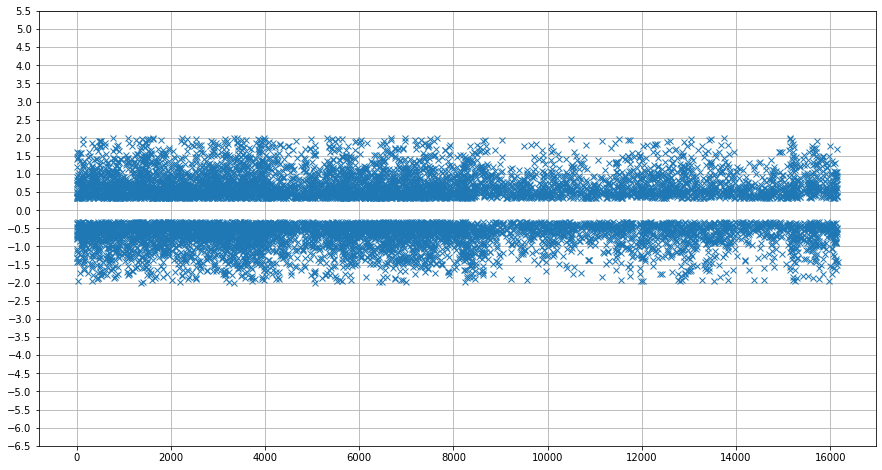

In [54]:
### data to train
# vals = [1, 2, 3, 4, 5, 6, 8, 33, 34, 35, 36, 37, 38, 46, 53, 54, 55, 56, 57, 58, 65, 66, 67, 68]
# koinz = ['EOS', 'UNI', 'XRP', 'ETC', 'DOT']

# COIN = koinz[4]
# COIN = ''
# dz = ds[ds.coin!=COIN]

# dq = dz[[f"val_{i}" for i in vals]]
# dq = dz.copy()
# X = dq.drop(columns=['coin', 'target1', 'target2', 'n', 'diff1', 'diff2', 'k1', 'k2']).values
# X = dq.values
X = ds.drop(columns=['coin', 'target1', 'target2', 'n', 'k1', 'k2']).values
Y = ds.target1.values

kl = 0.2
x_train, x_test, y_train, y_test = train_test_split(X.astype(np.float64), Y, test_size=kl, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

print((y_train==1).sum(), (y_train==0).sum(), 0, (y_test==1).sum(), (y_test==0).sum())

plt.figure(figsize=(15, 8))
plt.plot(ds.target2, "x")
# plt.plot(dog13.target2, "x")
# plt.yticks([i/10 for i in range(-10, 11, 5)])
plt.yticks([i/10 for i in range(-65, 58, 5)])
plt.grid()

In [55]:
ret = 54
model = Sequential()
model.add(Dense(ret, activation='sigmoid', input_shape=(ret,)))
model.add(Dropout(.05))
model.add(Dense(ret*2, activation='sigmoid'))
model.add(Dropout(.10))
# model.add(Dense(ret*3, activation='sigmoid'))
# model.add(Dropout(.1))

# model.add(Dense(52, activation='sigmoid', input_shape=(50,)))
# model.add(Dropout(.05))
# model.add(Dense(104, activation='sigmoid'))
# model.add(Dropout(.10))
# model.add(Dense(208, activation='sigmoid'))
# model.add(Dropout(.15))
# model.add(Dense(416, activation='sigmoid'))
# model.add(Dropout(.20))
# model.add(Dense(832, activation='sigmoid'))
# model.add(Dropout(.25))
# model.add(Dense(1664, activation='sigmoid'))
# model.add(Dropout(.30))

# model.add(Dense(416, activation='tanh'))
# model.add(Dropout(.05))
# model.add(Dense(312, activation='linear'))
# model.add(Dropout(.05))
# model.add(Dense(156, activation='relu'))
# model.add(Dropout(.05))

# model.add(Dense(106, activation='hard_sigmoid'))
# model.add(Dense(159, activation='hard_sigmoid'))
# model.add(Dense(212, activation='hard_sigmoid'))
# model.add(Dense(2, activation='hard_sigmoid'))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 54)                2970      
_________________________________________________________________
dropout_114 (Dropout)        (None, 54)                0         
_________________________________________________________________
dense_172 (Dense)            (None, 108)               5940      
_________________________________________________________________
dropout_115 (Dropout)        (None, 108)               0         
_________________________________________________________________
dense_173 (Dense)            (None, 1)                 109       
Total params: 9,019
Trainable params: 9,019
Non-trainable params: 0
_________________________________________________________________


In [56]:
opt = adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
# opt = rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# opt = gradient_descent_v2.SGD(learning_rate=0.001, decay=0.0)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# callback= EarlyStopping(monitor='val_loss')
epochs = 150
hist = model.fit(x_train, y_train,
          epochs=epochs,
          validation_data=(x_test, y_test),
          # callbacks=[callback],
          verbose=1)

Epoch 1/150
274/274 [==============================] - 1s 3ms/step - loss: 0.3828 - accuracy: 0.8369 - val_loss: 0.1656 - val_accuracy: 0.9452
Epoch 2/150
274/274 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9623 - val_loss: 0.0715 - val_accuracy: 0.9799
Epoch 3/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9775 - val_loss: 0.0415 - val_accuracy: 0.9904
Epoch 4/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0238 - val_accuracy: 0.9945
Epoch 5/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0305 - accuracy: 0.9923 - val_loss: 0.0143 - val_accuracy: 0.9986
Epoch 6/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0220 - accuracy: 0.9954 - val_loss: 0.0098 - val_accuracy: 0.9982
Epoch 7/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0183 - accuracy: 0.9963 - val_loss: 0.0083 - val_accuracy: 0.9986

274/274 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 7.8254e-04 - val_accuracy: 0.9995
Epoch 113/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 114/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 115/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 6.1900e-04 - val_accuracy: 1.0000
Epoch 116/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 0.9997 - val_loss: 2.9311e-04 - val_accuracy: 1.0000
Epoch 117/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 2.8603e-04 - val_accuracy: 1.0000
Epoch 118/150
274/274 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 3.7796e-04 - 

In [57]:
mm

4

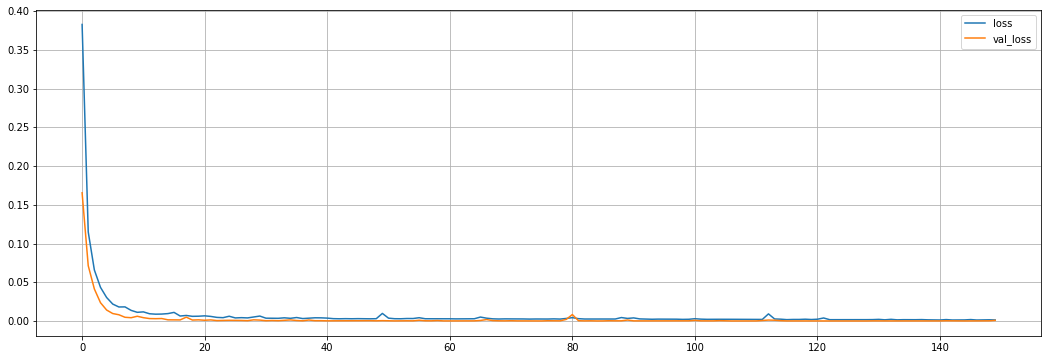

In [58]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()

In [59]:
score = model.evaluate(x_test, y_test,verbose=1)
print(score)

69/69 [==============================] - 0s 2ms/step - loss: 9.6849e-04 - accuracy: 0.9995
[0.0009684930555522442, 0.9995431900024414]


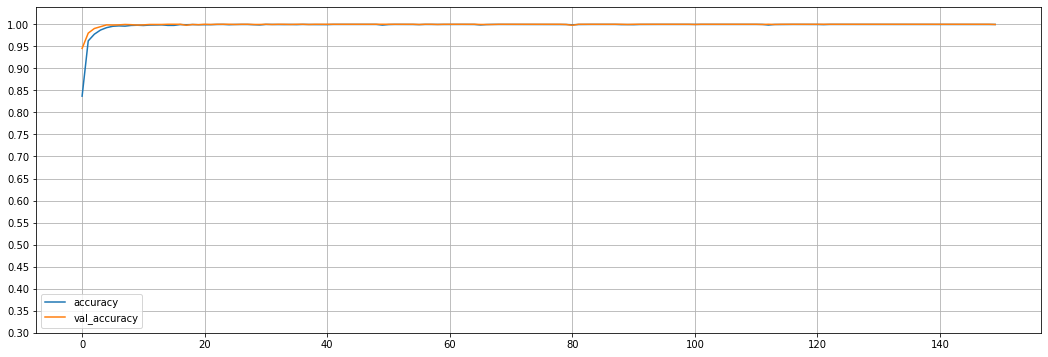

In [60]:
plt.figure(figsize=(18, 6))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.yticks([i/20 for i in range(0, 21)])
plt.ylim([0.3, 1.04])
plt.ylim([None, 1.04])
plt.grid()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00      1078

    accuracy                           1.00      2189
   macro avg       1.00      1.00      1.00      2189
weighted avg       1.00      1.00      1.00      2189



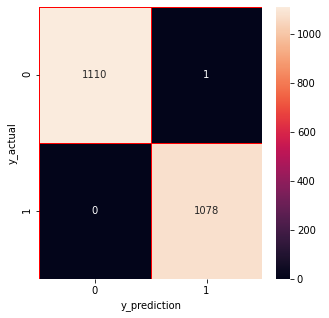

In [61]:
y_pred = model.predict(x_test)

y_actual = y_test
cm = confusion_matrix(list(y_actual.round().astype(int)), list(y_pred[:, 0].round().astype(int)))
texto = classification_report(list(y_actual.round().astype(int)), list(y_pred[:, 0].round().astype(int)), 
                              target_names=['0', '1'])
# texto = classification_report(y_test, y_prediction, target_names=['0', '1', '2'])
print(texto)
# Heatmap visualization of cunfusion matrix of the Random Forest Classification Model
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

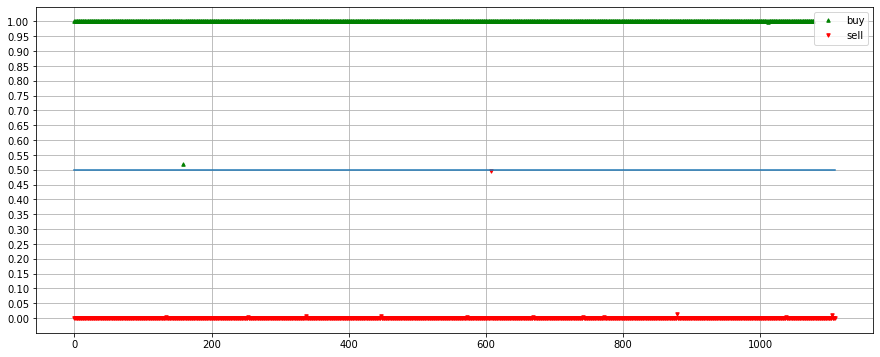

In [62]:
y_pred = model.predict(x_test)

plt.figure(figsize=(15, 6))
plt.plot(y_pred[y_pred>=.5], "^", c='g', markersize=3.5)
plt.plot(y_pred[y_pred<.5], "v", c='r', markersize=3.5)
plt.plot([0, max([len(y_pred[y_pred>=.5]), len(y_pred[y_pred<.5])])], [0.5, 0.5])
plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

In [63]:
weq = y_pred[y_pred>0.9]
print(weq.shape)
weq[weq<1]

(1078,)


array([0.99999976, 0.999999  , 0.9999988 , 0.99999976, 0.99986356],
      dtype=float32)

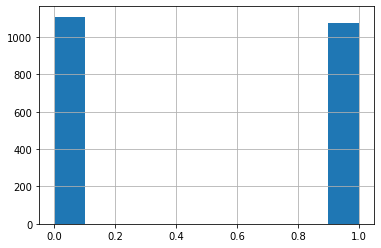

In [64]:
plt.hist(y_pred, bins=10);plt.grid()

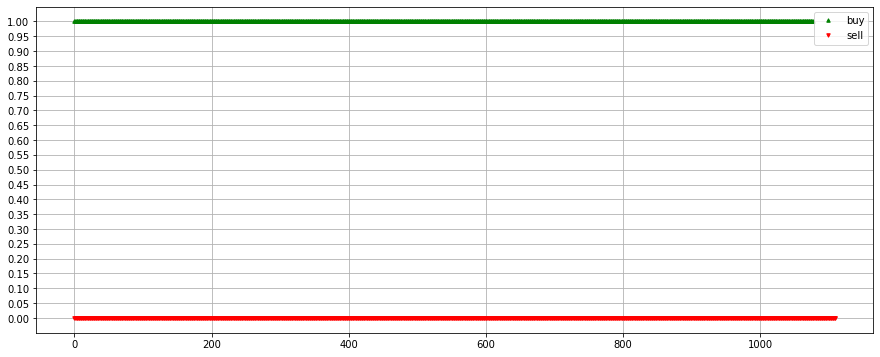

In [65]:
y_cur = y_test
plt.figure(figsize=(15, 6))
plt.plot(y_cur[y_cur>=.5], "^", c='g', markersize=3.5)
plt.plot(y_cur[y_cur<.5], "v", c='r', markersize=3.5)
plt.yticks([i/20 for i in range(0, 21)])
plt.legend(['buy', 'sell'])
plt.grid()

In [67]:
COIN = 'all'
kl2 = str(kl).replace(".", "p")
lim1 = str(lim1).replace(".", "d")
lim2 = str(float(lim2)).replace(".", "d")
name2 = name.split(".")[0]
# print(name2, mm, kl2)
r223 = None
dj = pl.DataFrame(x_train)
nnn1 = f'scaler_{name2.replace("_0", "d0")}_{COIN}_{kl2}_{lim1}_{lim2}_{epochs}e_{mm}m.csv'.replace('datas', 'all')
nnn2 = f'model_{name2.replace("_0", "d0")}_{COIN}_{kl2}_{lim1}_{lim2}_{epochs}e_{mm}m.h5'.replace('datas', 'all')
dj.to_csv(nnn1, sep="|")
model.save(nnn2)
print(nnn1)
print(nnn2)

scaler_futures_b14d0_all_0p2_0d325_2d0_150e_4m.csv
model_futures_b14d0_all_0p2_0d325_2d0_150e_4m.h5
